<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/65C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [6]:
# DATA 다운
df = pd.read_csv("https://raw.githubusercontent.com/arlenkim/study/main/65C3_GI_CFM_TOTAL_all.csv",encoding='euc-kr',header=1)

In [142]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [143]:
# view dimensions of dataset

df.head(5)

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,탱크온도,호스온도,노즐온도,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,1:평균출력2,1:평균출력3,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,2:평균출력2,2:평균출력3,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,3:평균출력2,3:평균출력3,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,4:평균출력2,4:평균출력3,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,5:평균출력2,5:평균출력3,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,6:평균출력2,6:평균출력3,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,7:평균출력2,7:평균출력3,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,8:평균출력2,8:평균출력3,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,9:평균출력2,9:평균출력3,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력 관리범위,10:평균출력1,10:평균출력2,10:평균출력3,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,11:평균출력2,11:평균출력3,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,12:평균출력2,12:평균출력3,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,13:평균출력2,13:평균출력3,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,14:평균출력2,14:평균출력3,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,15:평균출력2,15:평균출력3,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,16:평균출력2,16:평균출력3,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,17:평균출력2,17:평균출력3,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,18:평균출력2,18:평균출력3,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,19:평균출력2,19:평균출력3,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,20:평균출력2,20:평균출력3,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04,2,2022-10-04 8:18,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O42002,휨검사,NaN,2022-10-04 8:19,0,0,0,2022-10-04 8:27,2022-10-04 8:27,1.0,2.0,74,15.07,4508,2520,▣,1100 ~ 3100,2247,NaN,NaN,2.0,72,15.01,3088,1641,▣,1100 ~ 3100,1544,NaN,NaN,2.0,65,15.06,3092,1627,▣,1100 ~ 3100,1578,NaN,NaN,2.0,64,15.04,3022,1581,▣,1100 ~ 3100,1540,NaN,NaN,2.0,68,15.04,3001,1605,▣,1100 ~ 3100,1469,NaN,NaN,2.0,77,15.02,4037,2261,▣,1100 ~ 3100,1968,NaN,NaN,2.0,79,15.04,4361,2585,▣,1100 ~ 3100,2235,NaN,NaN,2.5,82,15.00,0,0,NaN,1100 ~ 3100,0,NaN,NaN,2.8,81,15.01,0,0,NaN,1100 ~ 3100,0,NaN,NaN,2.2,80,14.92,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,67,14.99,4040,2187,▣,1300 ~ 3100,2110,NaN,NaN,2.0,55,14.97,3742,2044,▣,1300 ~ 3100,2005,NaN,NaN,2.0,60,14.92,3614,1975,▣,1300 ~ 3100,1855,NaN,NaN,2.0,58,15.01,3963,2046,▣,1300 ~ 3100,2009,NaN,NaN,2.0,63,14.98,3724,1931,▣,1300 ~ 3100,1877,NaN,NaN,2.0,60,14.99,4488,2259,▣,1300 ~ 3100,2231,NaN,NaN,2.1,80,14.93,4555,2381,▣,1300 ~ 3100,2263,NaN,NaN,2.0,82,14.86,0,0,NaN,1600 ~ 3100,0,NaN,NaN,2.0,80,14.91,0,0,NaN,1600 ~ 3100,0,NaN,NaN,2.0,70,15.01,0,0,NaN,40 ~ 250,0,NaN,NaN,2022-10-04 8:28,1.0,2.1,81,15.03,4925,2503,▣,1300 ~ 3100,2351

In [144]:
df.shape

(42864, 349)

In [146]:
df.columns[0:39]

Index(['라인', '작업일자', '순번', '생성일시', '모델번호', '모델코드', '모델이름', '바코드', '최종공정', '선택',
       '작업일시', '탱크온도', '호스온도', '노즐온도', '작업일시.1', '작업일시.2', '작업횟수', '1:시간',
       '1:진폭', '1:주파수', '1:에너지', '1:최대출력', '1:사용여부', '1:평균출력 관리범위', '1:평균출력1',
       '1:평균출력2', '1:평균출력3', '2:시간', '2:진폭', '2:주파수', '2:에너지', '2:최대출력',
       '2:사용여부', '2:평균출력 관리범위', '2:평균출력1', '2:평균출력2', '2:평균출력3', '3:시간',
       '3:진폭'],
      dtype='object')

In [10]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4',
               '1:시간', '1:진폭', '1:주파수', '1:사용여부', '1:평균출력 관리범위', '1:평균출력2', '1:평균출력3',
               '2:시간', '2:진폭', '2:주파수', '2:사용여부', '2:평균출력 관리범위', '2:평균출력2', '2:평균출력3',
               '3:시간', '3:진폭', '3:주파수', '3:사용여부', '3:평균출력 관리범위', '3:평균출력2', '3:평균출력3',
               '4:시간', '4:진폭', '4:주파수', '4:사용여부', '4:평균출력 관리범위', '4:평균출력2', '4:평균출력3',
               '5:시간', '5:진폭', '5:주파수', '5:사용여부', '5:평균출력 관리범위', '5:평균출력2', '5:평균출력3',
               '6:시간', '6:진폭', '6:주파수', '6:사용여부', '6:평균출력 관리범위', '6:평균출력2', '6:평균출력3',
               '7:시간', '7:진폭', '7:주파수', '7:사용여부', '7:평균출력 관리범위', '7:평균출력2', '7:평균출력3',
               '8:시간', '8:진폭', '8:주파수', '8:사용여부', '8:평균출력 관리범위', '8:평균출력2', '8:평균출력3',
               '9:시간', '9:진폭', '9:주파수', '9:사용여부', '9:평균출력 관리범위', '9:평균출력2', '9:평균출력3',
               '10:시간', '10:진폭', '10:주파수', '10:사용여부', '10:평균출력 관리범위', '10:평균출력2', '10:평균출력3',
               '11:시간', '11:진폭', '11:주파수', '11:사용여부', '11:평균출력 관리범위', '11:평균출력2', '11:평균출력3',
               '12:시간', '12:진폭', '12:주파수', '12:사용여부', '12:평균출력 관리범위', '12:평균출력2', '12:평균출력3',
               '13:시간', '13:진폭', '13:주파수', '13:사용여부', '13:평균출력 관리범위', '13:평균출력2', '13:평균출력3',
               '14:시간', '14:진폭', '14:주파수', '14:사용여부', '14:평균출력 관리범위', '14:평균출력2', '14:평균출력3',
               '15:시간', '15:진폭', '15:주파수', '15:사용여부', '15:평균출력 관리범위', '15:평균출력2', '15:평균출력3',
               '16:시간', '16:진폭', '16:주파수', '16:사용여부', '16:평균출력 관리범위', '16:평균출력2', '16:평균출력3',
               '17:시간', '17:진폭', '17:주파수', '17:사용여부', '17:평균출력 관리범위', '17:평균출력2', '17:평균출력3',
               '18:시간', '18:진폭', '18:주파수', '18:사용여부', '18:평균출력 관리범위', '18:평균출력2', '18:평균출력3',
               '19:시간', '19:진폭', '19:주파수', '19:사용여부', '19:평균출력 관리범위', '19:평균출력2', '19:평균출력3',
               '20:시간', '20:진폭', '20:주파수', '20:사용여부', '20:평균출력 관리범위', '20:평균출력2', '20:평균출력3',
               '8:에너지', '8:최대출력', '8:평균출력1',
               '9:에너지', '9:최대출력', '9:평균출력1',
               '10:에너지', '10:최대출력', '10:평균출력1',
               '18:에너지', '18:최대출력', '18:평균출력1',
               '19:에너지', '19:최대출력', '19:평균출력1',
               '20:에너지', '20:최대출력', '20:평균출력1',
               '1:시간.1', '1:진폭.1', '1:주파수.1', '1:사용여부.1', '1:평균출력 관리범위.1', '1:평균출력2.1', '1:평균출력3.1',
               '2:시간.1', '2:진폭.1', '2:주파수.1', '2:사용여부.1', '2:평균출력 관리범위.1', '2:평균출력2.1', '2:평균출력3.1',
               '3:시간.1', '3:진폭.1', '3:주파수.1', '3:사용여부.1', '3:평균출력 관리범위.1', '3:평균출력2.1', '3:평균출력3.1',
               '4:시간.1', '4:진폭.1', '4:주파수.1', '4:사용여부.1', '4:평균출력 관리범위.1', '4:평균출력2.1', '4:평균출력3.1',
               '5:시간.1', '5:진폭.1', '5:주파수.1', '5:사용여부.1', '5:평균출력 관리범위.1', '5:평균출력2.1', '5:평균출력3.1',
               '6:시간.1', '6:진폭.1', '6:주파수.1', '6:사용여부.1', '6:평균출력 관리범위.1', '6:평균출력2.1', '6:평균출력3.1',
               '7:시간.1', '7:진폭.1', '7:주파수.1', '7:사용여부.1', '7:평균출력 관리범위.1', '7:평균출력2.1', '7:평균출력3.1',
               '8:시간.1', '8:진폭.1', '8:주파수.1', '8:사용여부.1', '8:평균출력 관리범위.1', '8:평균출력2.1', '8:평균출력3.1',
               '9:시간.1', '9:진폭.1', '9:주파수.1', '9:사용여부.1', '9:평균출력 관리범위.1', '9:평균출력2.1', '9:평균출력3.1',
               '10:시간.1', '10:진폭.1', '10:주파수.1', '10:사용여부.1', '10:평균출력 관리범위.1', '10:평균출력2.1', '10:평균출력3.1',
               '11:시간.1', '11:진폭.1', '11:주파수.1', '11:사용여부.1', '11:평균출력 관리범위.1', '11:평균출력2.1', '11:평균출력3.1',
               '12:시간.1', '12:진폭.1', '12:주파수.1', '12:사용여부.1', '12:평균출력 관리범위.1', '12:평균출력2.1', '12:평균출력3.1',
               '5:에너지.1', '5:최대출력.1','5:평균출력1.1', '6:에너지.1', '6:최대출력.1', '6:평균출력1.1',
               '11:에너지.1', '11:최대출력.1','11:평균출력1.1', '12:에너지.1', '12:최대출력.1', '12:평균출력1.1',
               ], axis=1)

In [12]:
df2.columns[10:55]

Index(['3:최대출력', '3:평균출력1', '4:에너지', '4:최대출력', '4:평균출력1', '5:에너지', '5:최대출력',
       '5:평균출력1', '6:에너지', '6:최대출력', '6:평균출력1', '7:에너지', '7:최대출력', '7:평균출력1',
       '11:에너지', '11:최대출력', '11:평균출력1', '12:에너지', '12:최대출력', '12:평균출력1',
       '13:에너지', '13:최대출력', '13:평균출력1', '14:에너지', '14:최대출력', '14:평균출력1',
       '15:에너지', '15:최대출력', '15:평균출력1', '16:에너지', '16:최대출력', '16:평균출력1',
       '17:에너지', '17:최대출력', '17:평균출력1', '1:에너지.1', '1:최대출력.1', '1:평균출력1.1',
       '2:에너지.1', '2:최대출력.1', '2:평균출력1.1', '3:에너지.1', '3:최대출력.1', '3:평균출력1.1',
       '4:에너지.1'],
      dtype='object')

In [13]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04 8:18,SACQ30454509KTS2O42002,4508,2520,2247,3088,1641,1544,3092,1627,1578,3022,1581,1540,3001,1605,1469,4037,2261,1968,4361,2585,2235,4040,2187,2110,3742,2044,2005,3614,1975,1855,3963,2046,2009,3724,1931,1877,4488,2259,2231,4555,2381,2263,4925,2503,2351,4931,2658,2579,4344,2323,2222,4263,2261,2207,5805,2999,2739,4353,2303,2262,4140,2322,2185,4271,2252,2202,合,-0.3,合,-1.1,合,-0.3,合,-0.7,合
1,2,2022-10-04 8:22,SACQ30454509KTS2O42004,5105,2989,2539,3643,2120,1889,3454,1917,1794,3180,1693,1627,3277,1826,1624,4377,2458,2254,4821,2726,2408,4039,2145,2074,3682,2040,1953,3744,2098,1880,3869,2072,2005,3760,2033,1924,4390,2289,2206,4705,2446,2366,4835,2484,2325,5189,2741,2679,4332,2330,2250,4411,2426,2353,5770,2999,2483,4434,2431,2317,3862,2230,1998,4360,2290,2219,合,-0.3,合,-1.1,合,-0.4,合,-0.7,合
2,2,2022-10-04 8:25,SACQ30454509KTS2O42006,5038,2965,2571,3537,2059,1808,3623,1892,1821,3201,1745,1681,3296,1996,1678,4240,2334,2180,4727,2891,2367,3938,2078,2012,3865,2118,2084,3630,1993,1853,3972,2158,2101,3758,2037,1983,4409,2427,2308,4750,2434,2404,4870,2542,2386,5045,2740,2615,4206,2291,2209,4491,2363,2294,5780,2999,2452,4360,2345,2262,4120,2274,2249,4198,2274,2162,合,-0.4,合,-1.4,合,-0.5,合,-0.7,合
3,2,2022-10-04 8:25,SACQ30454509KTS2O42008,4874,2770,2373,3494,1911,1783,3621,2080,1889,3248,1771,1720,3326,1974,1614,4334,2306,2168,5030,2774,2565,4080,2152,2042,3611,2029,1941,3681,2054,1842,3959,2048,2010,3780,2038,1979,4426,2293,2258,4523,2372,2241,4968,2605,2419,5303,2940,2812,4428,2366,2335,4390,2337,2284,5776,2999,2523,4397,2399,2289,4055,2373,2097,4190,2323,2165,合,-0.5,合,-1.4,合,-0.4,合,-0.6,合
4,2,2022-10-04 8:27,SACQ30454509KTS2O4200A,4792,2794,2414,3378,1830,1715,3678,1989,1899,3217,1763,1704,3290,1971,1638,4644,2581,2355,4925,2670,2452,4057,2232,2131,3630,2120,1994,3586,1947,1833,3921,2107,2073,3754,1955,1931,4494,2514,2290,4570,2302,2184,4888,2749,2441,4975,2740,2584,4468,2364,2303,4206,2283,2148,5775,2999,2530,4442,2382,2320,3782,2315,1976,4044,2217,2034,合,-1.7,合,-2.1,合,-0.4,合,-0.6,合


In [14]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1       object
좌측        float64
판정.2       object
우측        float64
판정.3       object
Length: 78, dtype: object

In [15]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,상측,하측,좌측,우측
count,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000
mean,2.506136,4205.926395,2370.045306,2118.365901,3173.878243,1842.987892,1664.060680,3180.354237,1875.446389,1672.427422,3140.534948,1834.323908,1689.872550,3308.178238,1978.058044,1732.666457,3504.440976,2078.800462,1834.247504,4352.785928,2510.928331,2208.934117,4197.325448,2385.895133,2273.860629,4324.448792,2506.069732,2343.832587,4441.951101,2434.620521,2337.959943,4562.604003,2517.597331,2402.887971,4373.402062,2420.900523,2321.020157,4603.292437,2580.104377,2420.581514,4555.650056,2546.401269,2403.750467,4521.688480,2548.537654,2413.530025,4465.903159,2560.141144,2447.134542,4272.071435,2509.209360,2356.135942,4297.358133,2526.561334,2392.609369,5021.759985,2809.533828,2503.300579,4502.400523,2598.963536,2492.590262,4378.755482,2531.908828,2407.833987,4179.009402,2373.418860,2293.668230,-0.591942,-1.086033,-0.371678,-0.152853
std,0.499968,682.285663,317.728099,304.348060,468.892704,222.830064,203.725179,494.252891,232.860482,214.241406,478.663783,265.722147,228.140246,478.283032,262.756568,232.272261,522.518821,271.433067,240.832058,580.570166,305.801192,258.002362,507.423013,346.363246,320.726763,527.391818,300.610705,264.404812,568.284113,294.833798,293.128935,627.670055,349.494884,323.080389,588.198653,323.483839,311.688175,620.438221,300.032730,274.229254,653.324540,331.406114,308.890124,695.969479,284.811669,270.398199,623.770589,252.559733,226.300187,702.487078,289.351438,281.876469,638.100523,299.706582,295.180652,912.922018,278.559165,223.058032,519.494044,328.196605,323.488231,576.678621,274.460452,284.768365,529.153115,225.467132,218.755267,0.500578,0.578133,0.396115,0.379935
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.500000,-2.500000,-2.400000
25%,2.000000,3915.000000,2236.000000,2024.000000,2835.000000,1737.000000,1568.000000,2856.000000,1756.000000,1561.000000,2880.000000,1667.000000,1556.000000,3040.000000,1836.000000,1596.000000,3209.000000,1943.750000,1727.000000,4090.000000,2342.000000,

In [16]:
df2.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 78, dtype: int64

In [17]:
df2.shape

(42864, 78)

In [18]:
df2 = df2.replace(0, np.NaN)

In [19]:
df3 =df2.dropna(axis=0) 
df3.shape

(32609, 78)

In [20]:
df3.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,상측,하측,좌측,우측
count,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000
mean,2.437732,4319.915330,2412.880125,2164.968720,3253.249900,1880.346530,1701.113680,3253.325892,1902.095526,1703.114999,3203.017603,1860.054310,1717.233954,3371.306694,2001.925266,1758.313717,3557.633015,2092.917722,1852.931583,4429.603208,2535.368211,2232.395934,4225.110951,2390.518691,2278.769266,4355.003496,2521.861572,2364.233892,4478.481708,2455.280505,2356.408906,4569.741881,2521.339753,2405.755466,4410.427827,2437.725935,2334.978871,4624.085437,2589.996872,2429.403754,4628.830507,2570.382962,2422.789629,4632.234015,2586.751142,2447.712779,4569.697599,2591.896777,2473.248520,4391.102824,2533.237419,2389.270385,4361.225459,2531.267534,2399.834340,5164.413107,2848.729308,2521.966052,4532.934957,2588.539912,2479.622804,4460.045478,2553.917262,2426.649085,4254.672299,2393.685424,2312.002913,-0.651069,-1.189156,-0.446325,-0.217412
std,0.496115,572.645257,235.969625,235.082395,396.156389,165.297541,149.475825,425.283215,179.703787,166.631207,410.827897,219.240462,182.763498,397.293337,208.365327,183.824372,435.552193,212.281569,188.415644,465.033012,229.450310,186.859606,399.119075,296.690735,270.919366,412.414314,230.774031,194.462023,457.948336,232.867978,235.685599,515.007144,289.207630,261.774408,488.034781,263.706287,252.333412,520.450449,224.914065,200.974934,569.600923,252.469328,231.914243,609.217464,207.354379,195.396931,541.749946,177.391489,141.241438,661.260540,234.106670,230.376437,594.714751,244.630169,244.341348,828.751632,181.431318,120.528959,400.541339,247.321065,243.003879,510.845622,209.896177,232.019373,453.447193,145.030287,141.748112,0.506727,0.546519,0.411355,0.407503
min,2.000000,2424.000000,1466.000000,1301.000000,2040.000000,1266.000000,1165.000000,2004.000000,1139.000000,1023.000000,1745.000000,1095.000000,927.000000,2034.000000,1282.000000,1071.000000,2196.000000,1228.000000,1092.000000,2853.000000,1652.000000,1548.000000,2563.000000,1547.000000,1486.000000,2914.000000,1685.000000,1576.000000,3463.000000,1809.000000,1726.000000,3427.000000,1819.000000,1780.000000,3087.000000,1613.000000,1554.000000,1436.000000,1751.000000,1699.000000,3045.000000,1748.000000,1687.000000,2418.000000,1839.000000,1399.000000,3255.000000,2111.000000,1937.000000,1986.000000,1727.000000,1379.000000,2181.000000,1711.000000,1279.000000,2952.000000,2136.000000,1664.000000,1215.000000,1971.000000,1720.000000,2634.000000,2036.000000,1719.000000,1256.000000,1960.000000,1860.000000,-3.000000,-3.500000,-2.500000,-2.400000
25%,2.000000,4051.000000,2296.000000,2075.000000,2921.00

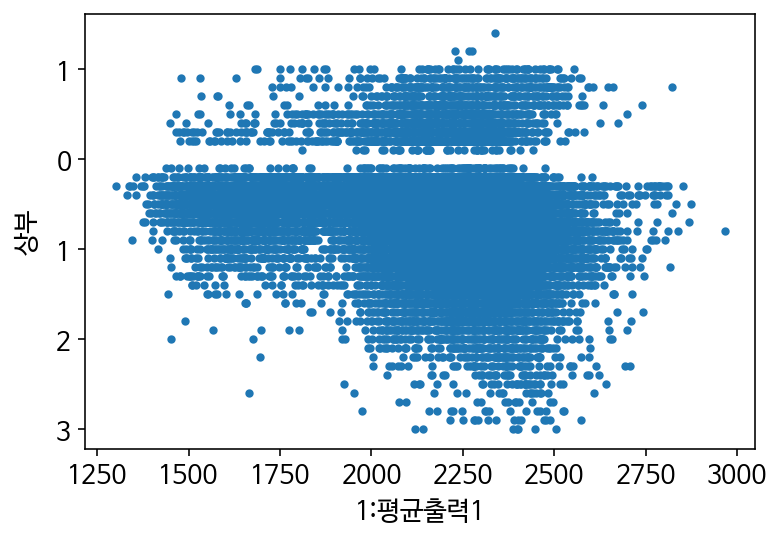

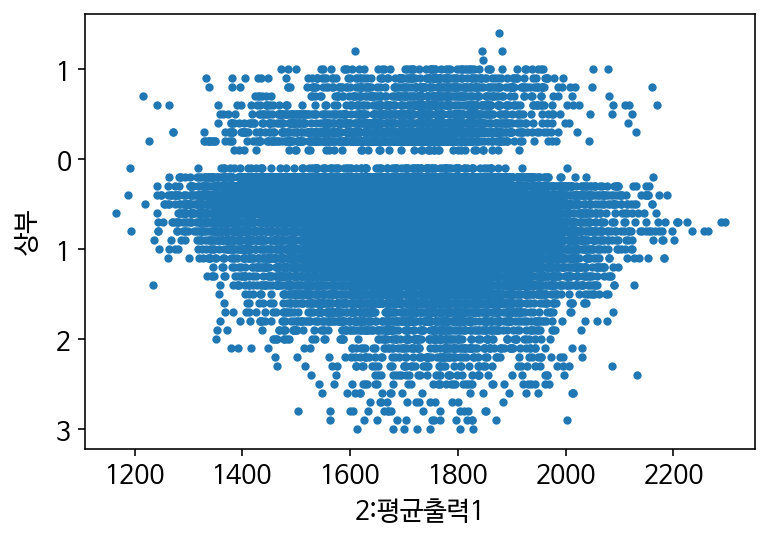

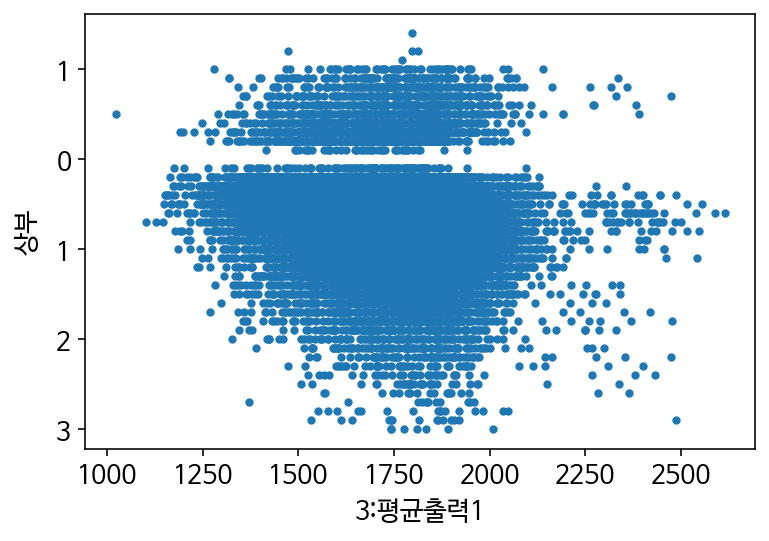

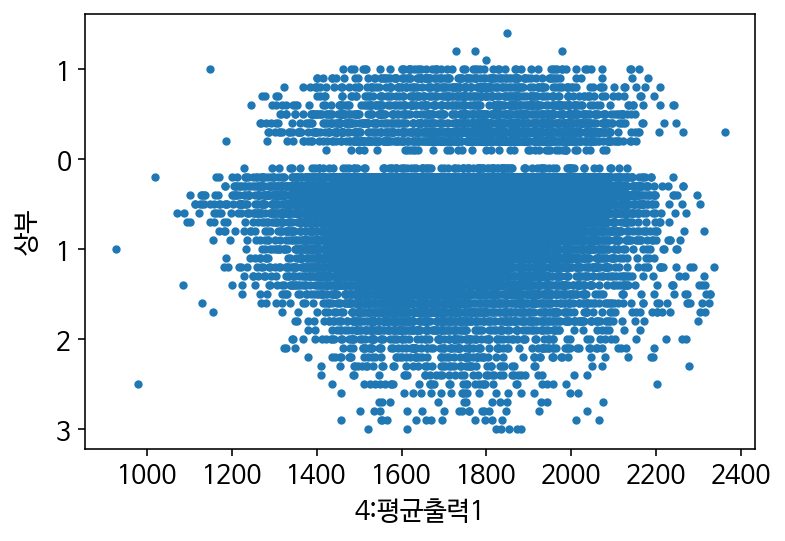

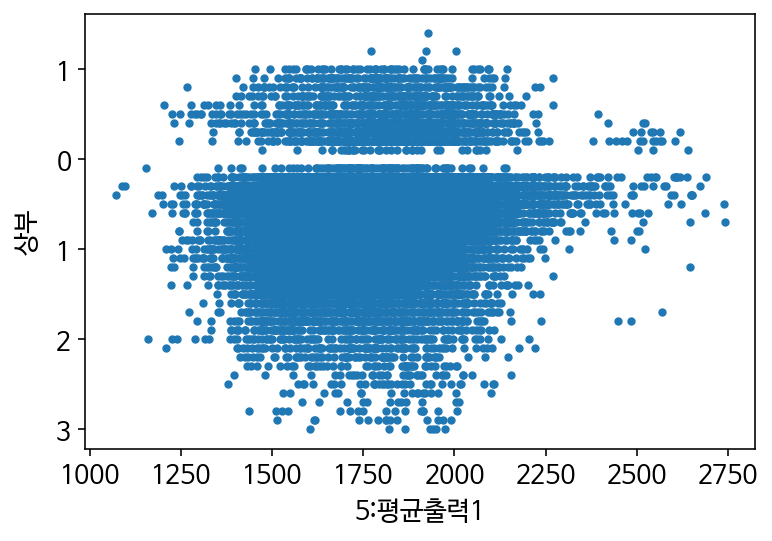

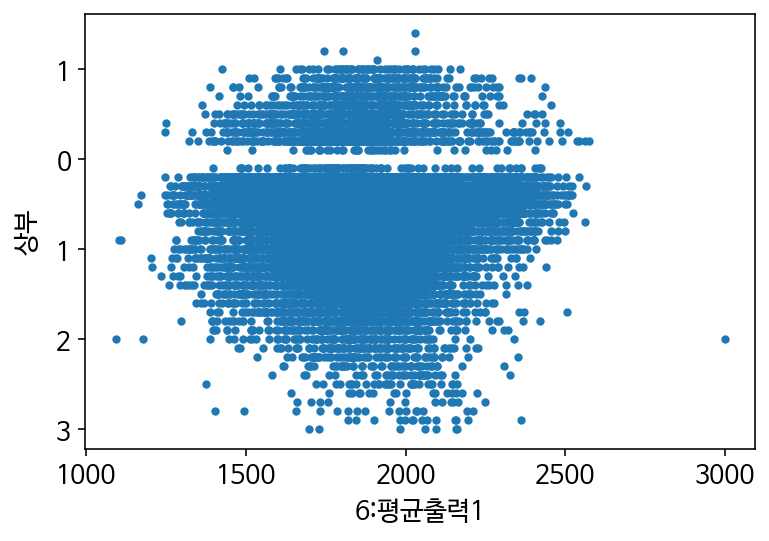

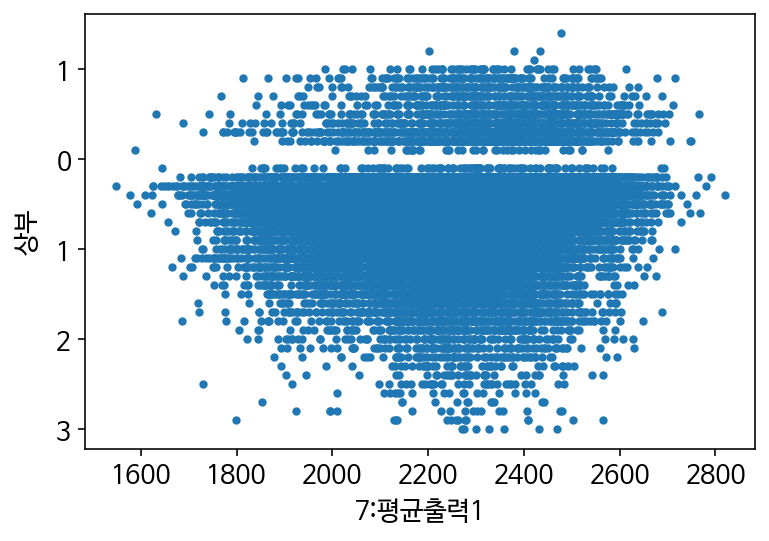

In [21]:
for col in ["1:평균출력1", "2:평균출력1","3:평균출력1","4:평균출력1","5:평균출력1", "6:평균출력1","7:평균출력1"]:
    plt.scatter(df3[col] , df3['상측'], s=10)
    plt.ylabel('상부')
    plt.xlabel(col)
    plt.show()

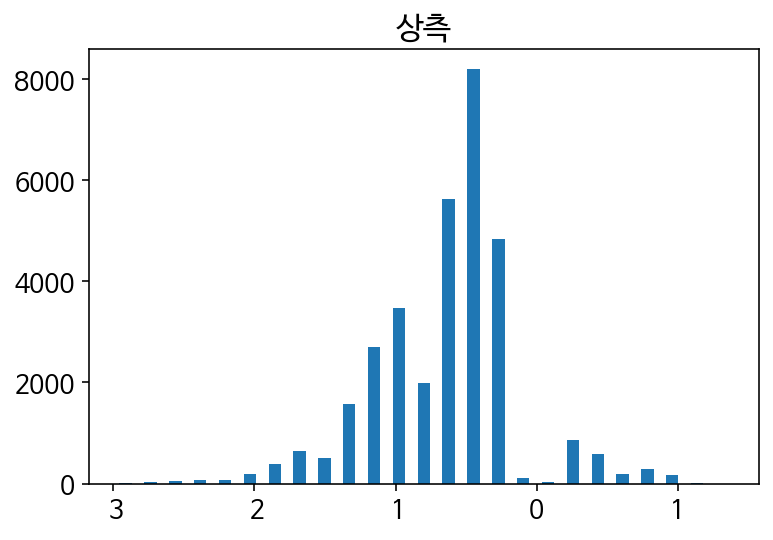

In [22]:
for col in ["상측"]:
    plt.hist(df3[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

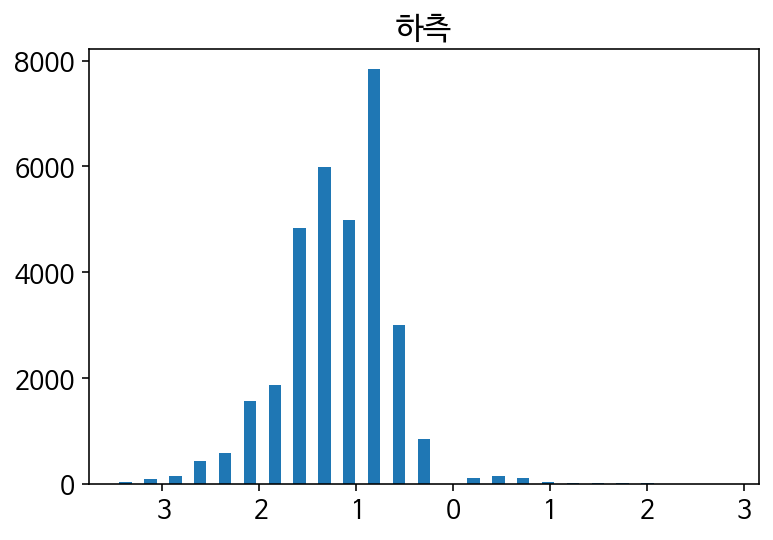

In [149]:
for col in ["하측"]:
    plt.hist(df3[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [39]:
df3.columns[0:70]

Index(['라인', '생성일시', '바코드', '1:에너지', '1:최대출력', '1:평균출력1', '2:에너지', '2:최대출력',
       '2:평균출력1', '3:에너지', '3:최대출력', '3:평균출력1', '4:에너지', '4:최대출력', '4:평균출력1',
       '5:에너지', '5:최대출력', '5:평균출력1', '6:에너지', '6:최대출력', '6:평균출력1', '7:에너지',
       '7:최대출력', '7:평균출력1', '11:에너지', '11:최대출력', '11:평균출력1', '12:에너지',
       '12:최대출력', '12:평균출력1', '13:에너지', '13:최대출력', '13:평균출력1', '14:에너지',
       '14:최대출력', '14:평균출력1', '15:에너지', '15:최대출력', '15:평균출력1', '16:에너지',
       '16:최대출력', '16:평균출력1', '17:에너지', '17:최대출력', '17:평균출력1', '1:에너지.1',
       '1:최대출력.1', '1:평균출력1.1', '2:에너지.1', '2:최대출력.1', '2:평균출력1.1', '3:에너지.1',
       '3:최대출력.1', '3:평균출력1.1', '4:에너지.1', '4:최대출력.1', '4:평균출력1.1', '7:에너지.1',
       '7:최대출력.1', '7:평균출력1.1', '8:에너지.1', '8:최대출력.1', '8:평균출력1.1', '9:에너지.1',
       '9:최대출력.1', '9:평균출력1.1', '10:에너지.1', '10:최대출력.1', '10:평균출력1.1', '종합판정'],
      dtype='object')

In [128]:
## 훈련 데이터와 검증 데이터 준비

features = df3.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하측", "판정.1", "좌측", "판정.2", "우측", "판정.3","상측",
       '1:에너지1',  '1:최대출력', #'1:평균출력',
       '2:에너지1',  '2:최대출력', #'2:평균출력',
       '3:에너지1',  '3:최대출력', #'3:평균출력',
       '4:에너지1',  '4:최대출력', #'4:평균출력',
       '5:에너지1',  '5:최대출력', #'5:평균출력',
       '6:에너지1',  '6:최대출력', #'6:평균출력',
       '7:에너지1',  '7:최대출력', #'7:평균출력',  
       '8:에너지1',  '8:최대출력', #'8:평균출력',
       '9:에너지1',  '9:최대출력', #'9:평균출력',
       '10:에너지1', '10:최대출력', #'10:평균출력', 

       '11:에너지1', '11:최대출력', #'11:평균출력1', 
       '12:에너지1', '12:최대출력', #'12:평균출력1', 
       '13:에너지1', '13:최대출력', #'13:평균출력1', 
       '14:에너지1', '14:최대출력', #'14:평균출력1', 
       '15:에너지1', '15:최대출력', #'15:평균출력1',
       '16:에너지1', '16:최대출력', #'16:평균출력1', 
       '17:에너지1', '17:최대출력', #'17:평균출력1', 

       '1:에너지.11', '1:최대출력.1', #'1:평균출력1.1', 
       '2:에너지.11', '2:최대출력.1', #'2:평균출력1.1', 
       '3:에너지.11', '3:최대출력.1', #'3:평균출력1.1', 
       '4:에너지.11', '4:최대출력.1', #'4:평균출력1.1', 
       '5:에너지.11', '5:최대출력.1', #'5:평균출력1.1', 
       '6:에너지.11', '6:최대출력.1', #'6:평균출력1.1',  
       '7:에너지.11', '7:최대출력.1', #'7:평균출력1.1',  
       '8:에너지.11', '8:최대출력.1', #'8:평균출력1.1',  
       '9:에너지.11', '9:최대출력.1', #'9:평균출력1.1', 
       '10:에너지.11', '10:최대출력.1', #'10:평균출력1.1', 
           
       ])
X = df3[features]
y = df3["상측"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=9, shuffle=True)

In [129]:
X_train

,10:에너지.1,10:평균출력1.1,11:에너지,11:평균출력1,12:에너지,12:평균출력1,13:에너지,13:평균출력1,14:에너지,14:평균출력1,15:에너지,15:평균출력1,16:에너지,16:평균출력1,17:에너지,17:평균출력1,1:에너지,1:에너지.1,1:평균출력1,1:평균출력1.1,2:에너지,2:에너지.1,2:평균출력1,2:평균출력1.1,3:에너지,3:에너지.1,3:평균출력1,3:평균출력1.1,4:에너지,4:에너지.1,4:평균출력1,4:평균출력1.1,5:에너지,5:평균출력1,6:에너지,6:평균출력1,7:에너지,7:에너지.1,7:평균출력1,7:평균출력1.1,8:에너지.1,8:평균출력1.1,9:에너지.1,9:평균출력1.1
9352,4263.0,2274.0,3903.0,1979.0,4224.0,2242.0,4426.0,2239.0,4443.0,2332.0,4365.0,2283.0,4679.0,2497.0,4308.0,2213.0,4554.0,4924.0,2349.0,2566.0,3035.0,4948.0,1587.0,2556.0,3261.0,4304.0,1675.0,2236.0,3168.0,3731.0,1722.0,2026.0,3294.0,1612.0,3811.0,1949.0,4286.0,5725.0,2302.0,2565.0,4273.0,2193.0,4429.0,2297.0
35915,3714.0,2196.0,3684.0,2037.0,4626.0,2223.0,4923.0,2370.0,4871.0,2295.0,4872.0,2352.0,4956.0,2319.0,4782.0,2328.0,3891.0,4235.0,2042.0,2249.0,2737.0,4133.0,1328.0,2441.0,2541.0,3972.0,1281.0,2425.0,2508.0,4157.0,1356.0,2479.0,2882.0,1576.0,4323.0,2237.0,4416.0,5085.0,2285.0,2746.0,5007.0,2830.0,3983.0,2336.0
8514,4076.0,2204.0,3546.0,2052.0,5611.0,2999.0,4949.0,2624.0,4508.0,2373.0,4417.0,2275.0,4943.0,2513.0,4215.0,2291.0,4631.0,5092.0,2316.0,2586.0,3263.0,4852.0,1622.0,2618.0,3531.0,4260.0,1812.0,2208.0,3034.0,3535.0,1659.0,2070.0,3476.0,1752.0,3981.0,2038.0,4514.0,5781.0,2246.0,2665.0,4392.0,2231.0,4298.0,2188.0
7778,5136.0,2596.0,3983.0,2103.0,4884.0,2438.0,5265.0,2416.0,5421.0,2498.0,5194.0,2376.0,5548.0,2554.0,5252.0,2484.0,4996.0,5616.0,2318.0,2727.0,3548.0,5176.0,1738.0,2573.0,3402.0,5237.0,1703.0,2720.0,3257.0,4928.0,1714.0,2527.0,3471.0,1802.0,4213.0,2095.0,5229.0,6371.0,2381.0,2589.0,5401.0,2704.0,5357.0,2730.0
13576,4514.0,2368.0,4159.0,2107.0,4508.0,2406.0,4412.0,2278.0,4083.0,2131.0,4188.0,2179.0,4064.0,2050.0,5156.0,2498.0,4941.0,4752.0,2349.0,2426.0,3336.0,4614.0,1655.0,2386.0,3561.0,4455.0,1799.0,2316.0,3251.0,4421.0,1686.0,2262.0,3441.0,1700.0,3721.0,1803.0,4596.0,5791.0,2186.0,2739.0,4432.0,2281.0,4334.0,2263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,4046.0,2396.0,4688.0,2708.0,3952.0,2462.0,5037.0,2978.0,4686.0,2730.0,4181.0,2469.0,4413.0,2627.0,4231.0,2464.0,2834.0,4147.0,1415.0,2461.0,2616.0,4157.0,1393.0,2535.0,2775.0,3983.0,1481.0,2396.0,2581.0,4772.0,1400.0,2826.0,2707.0,1422.0,2855.0,1627.0,3469.0,3779.0,1694.0,2319.0,4643.0,2811.0,4083.0,2432.0
595,4123.0,2167.0,4005.0,2047.0,3691.0,1995.0,3742.0,1954.0,3578.0,1840.0,3728.0,1887.0,4391.0,2280.0,4444.0,2195.0,4595.0,4823.0,2323.0,2397.0,3317.0,4998.0,1646.0,2618.0,3354.0,4302.0,1734.0,2239.0,2809.0,4806.0,1499.0,2474.0,3006.0,1471.0,3899.0,1977.0,4508.0,5773.0,2253.0,2726.0,4304.0,2205.0,4259.0,2176.0
28297,4127.0,2465.0,5023.0,2999.0,4229.0,2519.0,4233.0,2519.0,4411.0,2625.0,4248.0,2548.0,4264.0,2556.0,3944.0,2436.0,3084.0,3719.0,1568.0,2225.0,3165.0,3944.0,1666.0,2381.0,3244.0,3441.0,1662.0,2096.0,2604.0,3776.0,1384.0,2288.0,3197.0,1691.0,3440.0,1827.0,3791.0,4026.0,2050.0,2429.0,4776.0,2875.0,4312.0,2601.0
24071,4064.0,2405.0,4638.0,2716.0,4317.0,2582.0,4890.0,2854.0,4364.0,2495.0,4245.0,2539.0,4155.0,2439.0,4599.0,2706.0,4421.0,4006.0,2268.0,2396.0,2797.0,3993.0,1629.0,2443.0,2911.0,3646.0,1707.0,2250.0,3049.0,4270.0,1795.0,2553.0,3343.0,1939.0,2837.0,1703.0,4507.0,4151.0,2343.0,2477.0,4391.0,2711.0,4983.0,2956.0


In [130]:
X_train.shape, X_test.shape

((19565, 44), (13044, 44))

In [112]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [113]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

depth:  6 , R-squared:  0.3651


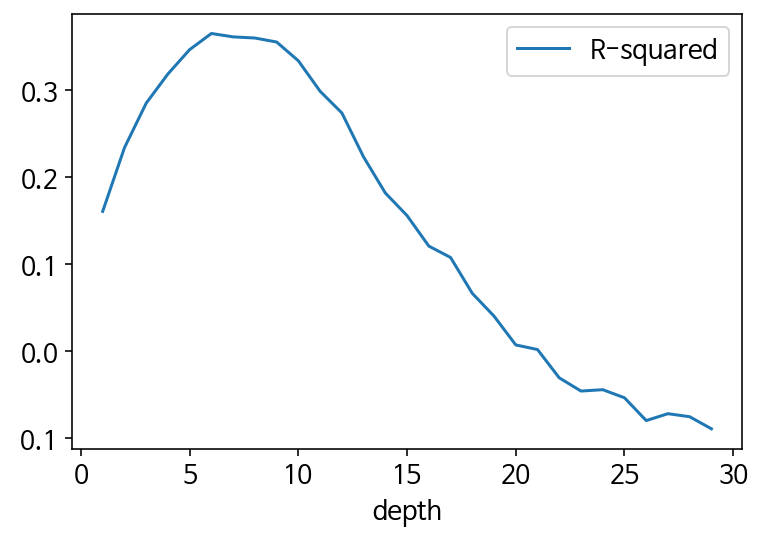

In [133]:
## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.5
Mean Absolute Error:  0.268
Root Mean Squared Error:  0.406
R-Squared:  0.366


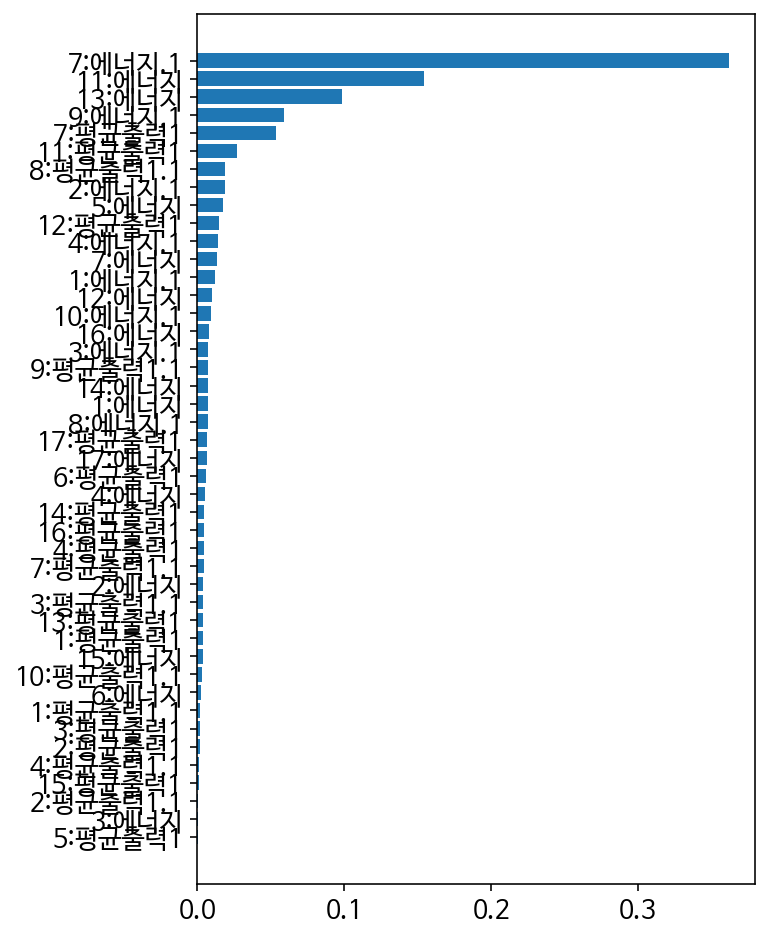

In [132]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  19 , R-squared:  0.4873


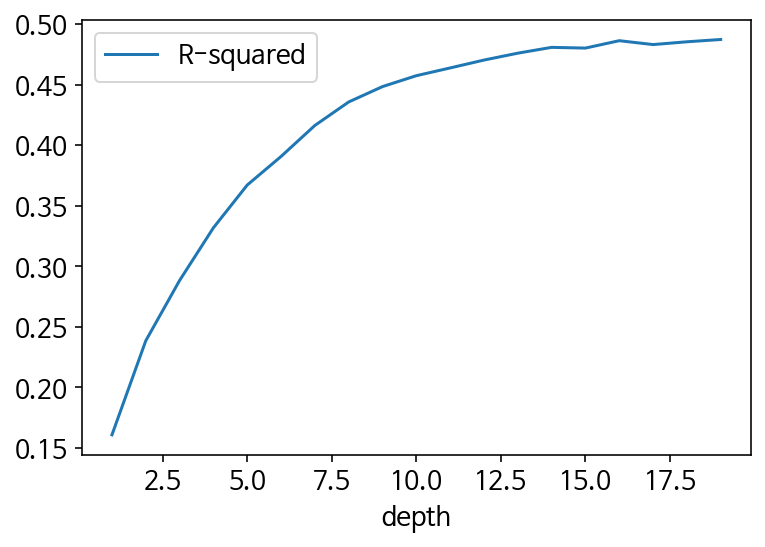

In [147]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,20):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.16
Mean Absolute Error:  0.24
Root Mean Squared Error:  0.364
R-Squared:  0.49


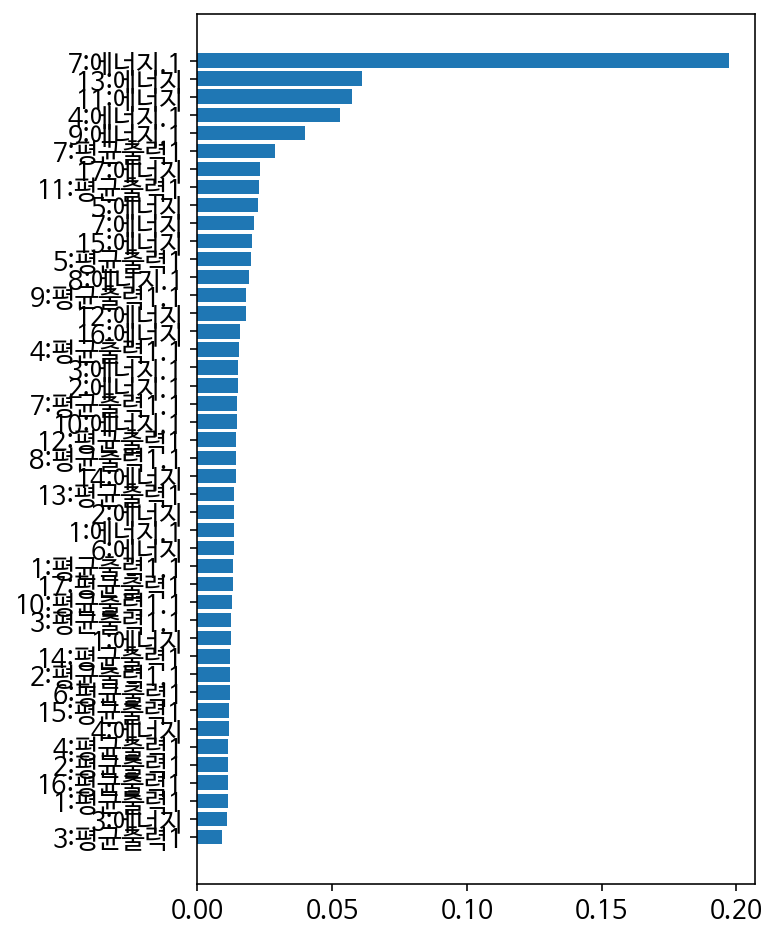

In [148]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  11 , R-squared:  0.4663


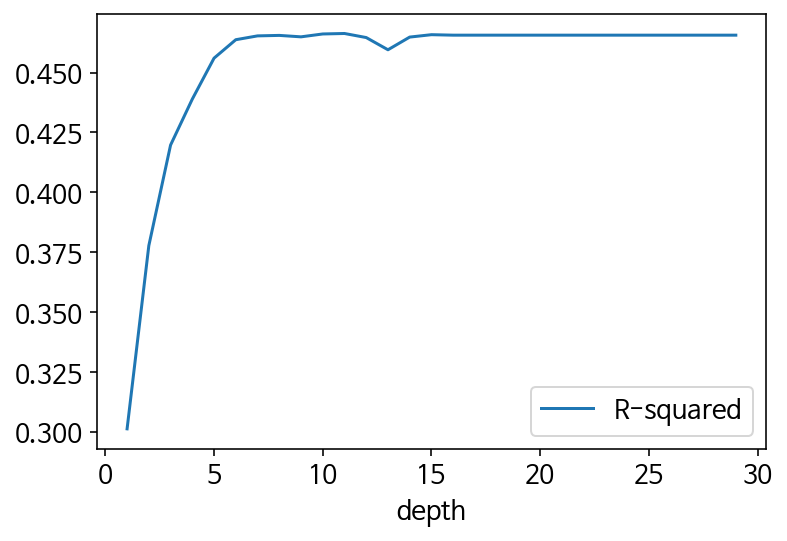

In [138]:
## LightGBM 부스팅 모델을 이용한 회귀 예측
# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다

res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.232
Mean Absolute Error:  0.248
Root Mean Squared Error:  0.373
R-Squared:  0.466


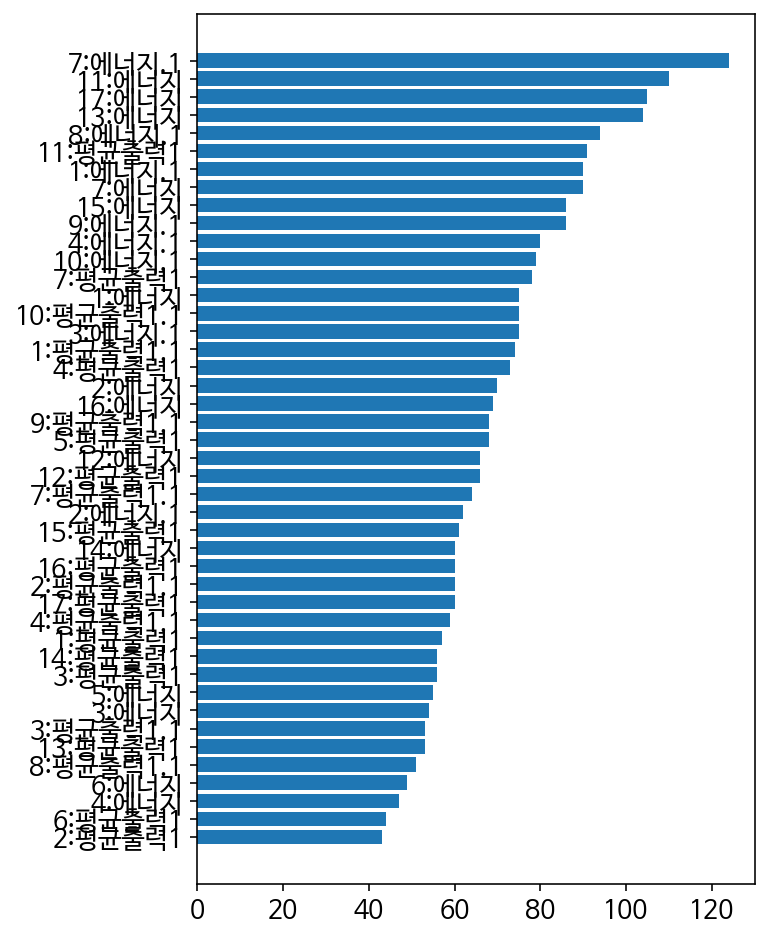

In [139]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [99]:
y_test

8363    -0.9
17329   -1.2
42465    0.2
16015   -1.1
19254   -0.6
        ... 
8548    -1.0
38428   -0.6
23061   -0.6
25803   -0.5
5845    -1.7
Name: 상측, Length: 13044, dtype: float64

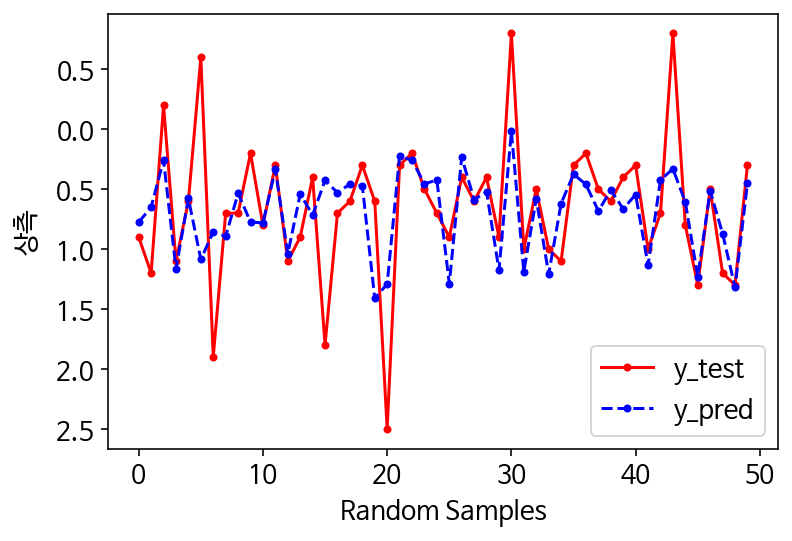

In [140]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상측")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)